# Toolbox

In [1]:
from Tools.DataTools import onehotcoding_string, onehotcoding, clean_dataset,load_dataset, ReSamplingData, path_to_tensor, paths_to_tensor
from Tools.PlotTools import Plot_disease_count, Plot_image_check, plot_model_history, Classification_ROC_Report, Plot_predict
from Tools.ModelTools import model_training, HistoryTraining_Save
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
from Tools.tqdm import tqdm
from keras import backend as K 
K.tensorflow_backend._get_available_gpus() 

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


['/job:localhost/replica:0/task:0/device:GPU:0']

In [ ]:

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(227, 227)))
    # convert PIL.Image.Image type to 3D tensor with shape (227, 227, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 227, 352270, 3) and return 4D tensor
    x = np.expand_dims(x, axis=0)
    # convert 
    x = preprocess_input(x)
    return x

def paths_to_tensor(img_paths):
    # List files for loading and reshaping
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)] 
    return np.vstack(list_of_tensors)



In [2]:
# Model name for model saving 
Model_Name = 'saved_model/VGG16_Model.hdf5'

# Loading data

In [3]:
#------------------------
# Get files path and target label for classification
X_train_init, Y_train_init, Y_names_train = load_dataset('OCT2017/train')
X_test_init, Y_test_init, Y_names_test = load_dataset('OCT2017/test')
X_val, Y_val, Y_names_val = load_dataset('OCT2017/val')
# Split training dataset
X_train, X_train1, Y_train, Y_train1 = train_test_split(X_train_init, Y_train_init, test_size=0.95) # Re-comment 
X_test, Y_test = X_test_init, Y_test_init

print('X_train : ',X_train.shape, 'Cases')
print('X_test : ',X_test.shape, 'Cases')
print('X_val : ',X_val.shape, 'Cases')
print('Y_train : ',Y_train.shape, 'Cases')
print('Y_test : ',Y_test.shape, 'Cases')
print('Y_val : ',Y_val.shape, 'Cases')

Read Folder :  OCT2017/train
Read Folder :  OCT2017/test
Read Folder :  OCT2017/val
X_train :  (4174,) Cases
X_test :  (968,) Cases
X_val :  (32,) Cases
Y_train :  (4174,) Cases
Y_test :  (968,) Cases
Y_val :  (32,) Cases


# Resampling

In [4]:
#------------------------
#Resampling check
X_train_ROS, Y_train_ROS = ReSamplingData(X_train,Y_train,'ROS')
X_test_ROS, Y_test_ROS = ReSamplingData(X_test,Y_test,'ROS')
print('X_train_ROS : ',X_train_ROS.shape, 'Cases')
print('Y_train_ROS : ',Y_train_ROS.shape, 'Cases')
#
X_train_RUS, Y_train_RUS = ReSamplingData(X_train,Y_train,'RUS')
X_test_RUS, Y_test_RUS = ReSamplingData(X_test,Y_test,'RUS')
print('X_train_RUS : ',X_train_RUS.shape, 'Cases')
print('Y_train_RUS : ',Y_train_RUS.shape, 'Cases')
#
#Resamping dataset for model training
X_train_Resample, Y_train_Resample = ReSamplingData(X_train,Y_train,'RUS')
X_test_Resample, Y_test_Resample = ReSamplingData(X_test,Y_test,'RUS')
#

X_train_ROS :  (7200,) Cases
Y_train_ROS :  (7200,) Cases
X_train_RUS :  (1860,) Cases
Y_train_RUS :  (1860,) Cases


# Plot dataset

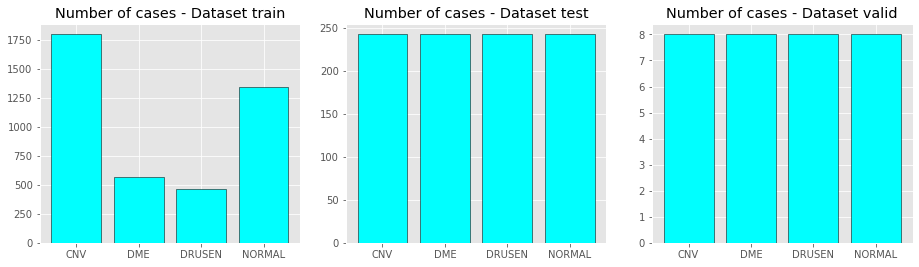

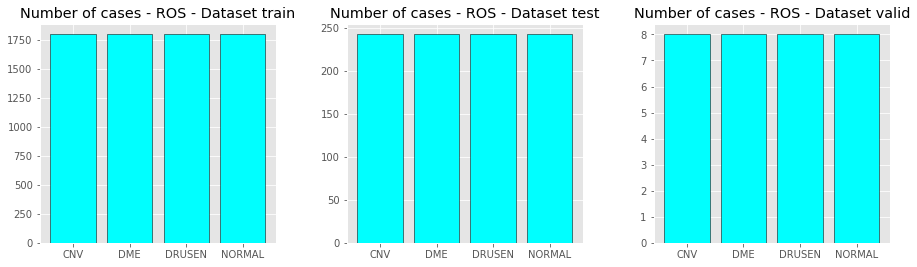

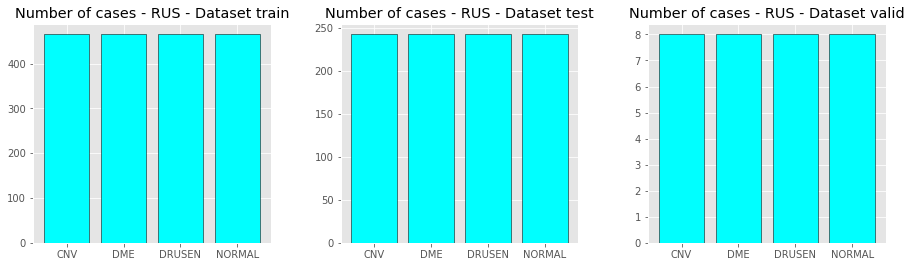

In [5]:
#------------------------
# PLOT NUMBER OF DISEASE PER DATASET
Plot_disease_count(Y_train,Y_test,Y_val,Y_names_train,['Number of cases - Dataset '])
Plot_disease_count(Y_train_ROS,Y_test_ROS,Y_val,Y_names_train,['Number of cases - ROS - Dataset '])
Plot_disease_count(Y_train_RUS,Y_test_RUS,Y_val,Y_names_train,['Number of cases - RUS - Dataset '])


# Convert paths to tensor

In [6]:
#------------------------
# Convert image data to tensorflow format
X_train_transform = paths_to_tensor(X_train_Resample).astype('float32')
Y_train_transform = onehotcoding(Y_train_Resample)
X_test_transform = paths_to_tensor(X_test_Resample).astype('float32')
Y_test_transform = onehotcoding(Y_test_Resample)
X_valid = paths_to_tensor(X_val).astype('float32')
Y_valid = onehotcoding(Y_val)

# Image Data Generator

In [7]:
# create and configure augmented image generator
# Training dataset
datagen_train = ImageDataGenerator(
#         featurewise_center=True, 
#         featurewise_std_normalization=True,
        rescale=1/255.,
        rotation_range=20.,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest') 
datagen_train.fit(X_train_transform)
print('datagen_train fit Done')
#
# Testing dataset
datagen_test = ImageDataGenerator(
        rescale=1/255.)
#         featurewise_center=True, 
#         featurewise_std_normalization=True)
datagen_test.fit(X_test_transform)
print('datagen_test fit Done')

datagen_train fit Done
datagen_test fit Done


# Plot image augmentation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

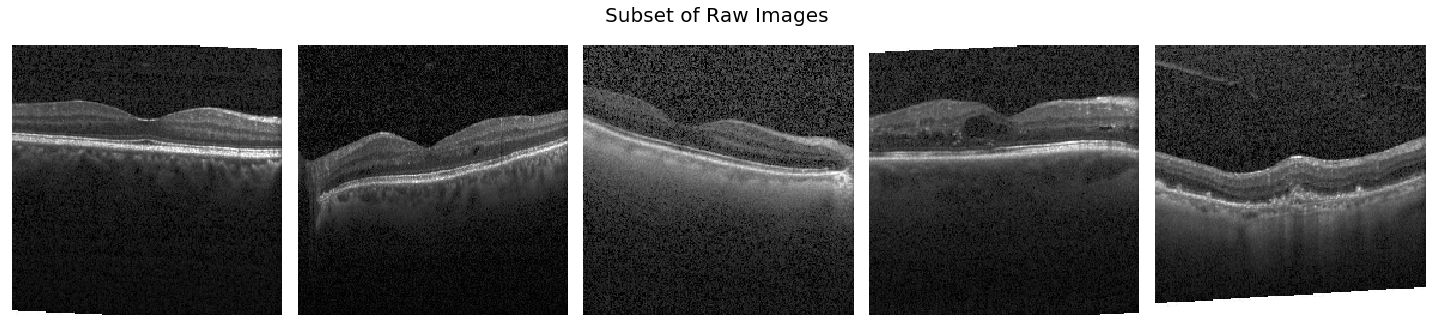

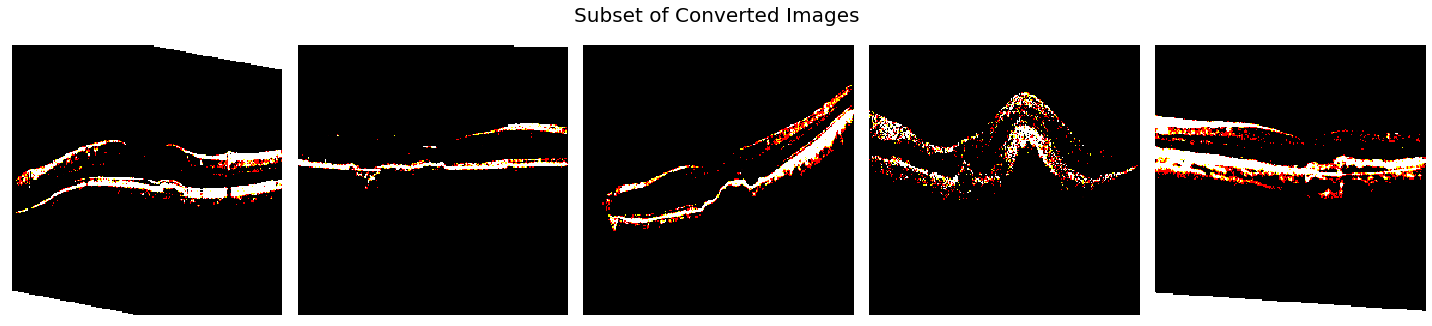

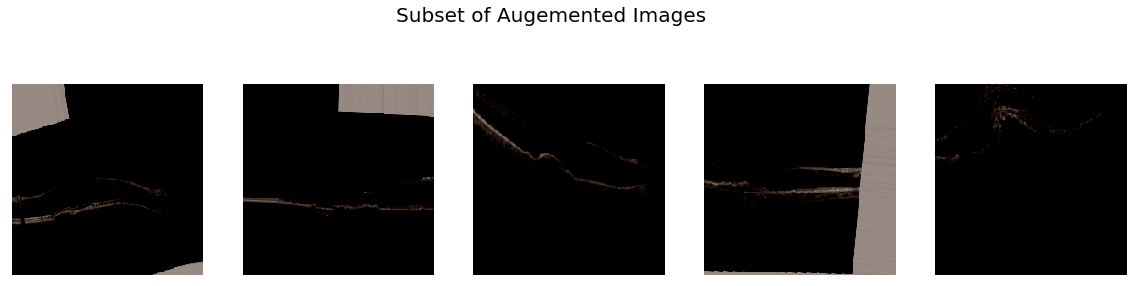

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

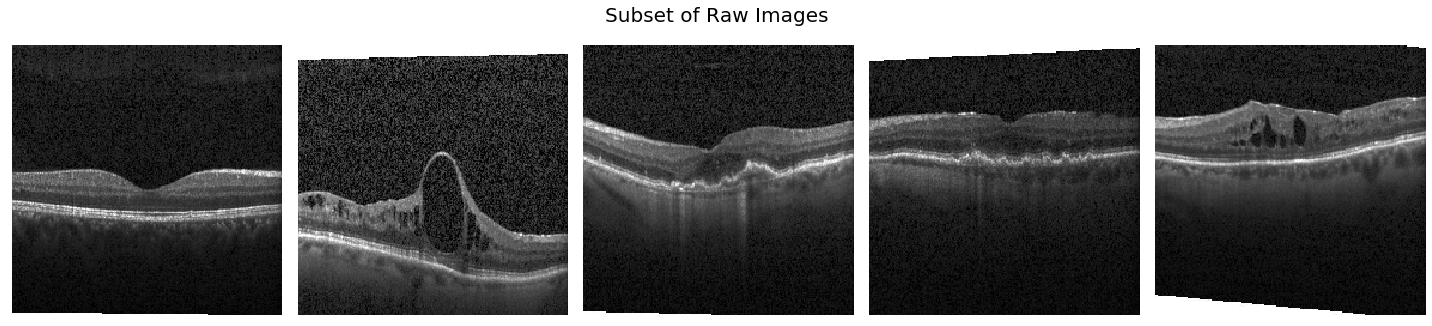

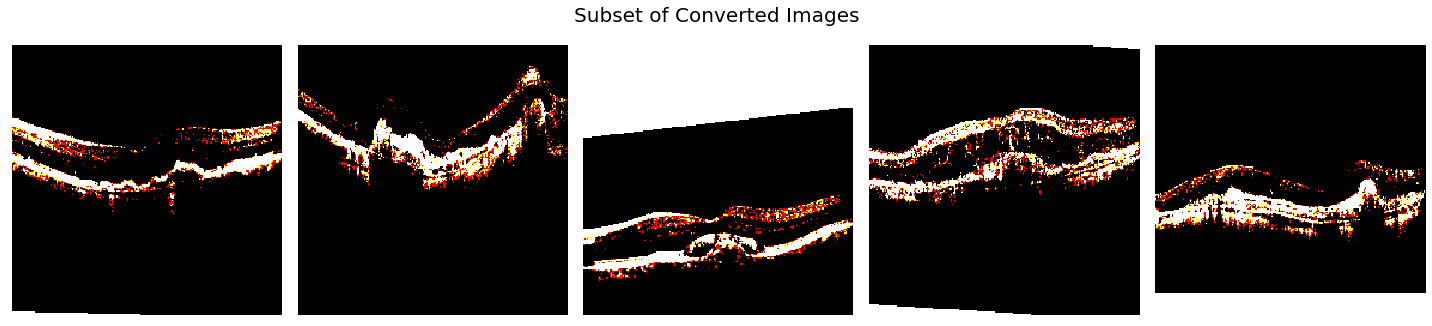

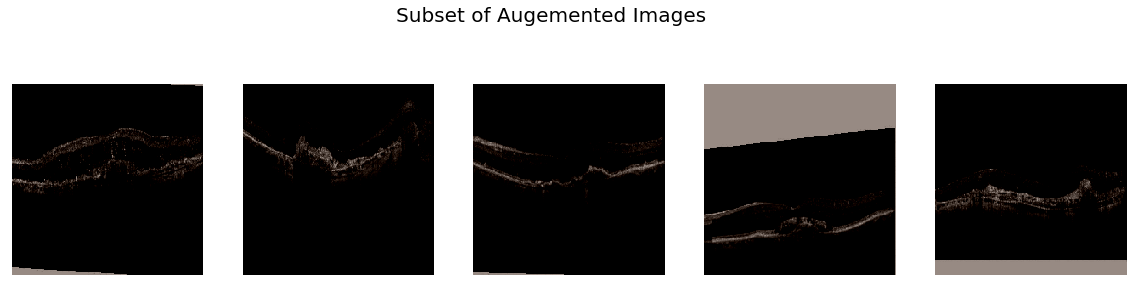

In [8]:
#------------------------
# PLOT AUGMENTATION
Plot_image_check(X_train_transform,X_train,datagen_train)
Plot_image_check(X_test_transform,X_test,datagen_test)

# Load model

In [9]:
from keras_squeezenet import SqueezeNet
from keras.engine import InputLayer
from keras.layers import GlobalAveragePooling2D, Dense, Dropout,Conv2D, MaxPooling2D, Convolution2D, AveragePooling2D, Activation, Concatenate
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Flatten, Dense, merge
import keras
from keras.callbacks import ModelCheckpoint
import pandas as pd
from keras.applications import VGG16
from keras_applications.imagenet_utils import _obtain_input_shape
from keras import backend as K
from keras.layers import Input, Convolution2D, MaxPooling2D, Activation, concatenate, Dropout, warnings
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.models import Model
from keras.engine.topology import get_source_inputs
from keras.utils import get_file
from keras.utils import layer_utils

def VGG16_Model(Model_Name):
    """
    VGG16 pretrained model. 
    Input data : 
        Model_Name -> Name of the model for saving

    Output data :
        callbacks  -> Training parameters settings
        model      -> VGG16 model built
    """
    #------------------------------------
    # Load squeezenet model 
    print('------------------------------------------------------')
    print('------------------Import VGG16 Model------------------')
    print('------------------------------------------------------','\n')
 
    # VGG16 was designed to work on 227 x 227 pixel input images sizes
    img_rows, img_cols = 227, 227 

    # Re-loads the VGG16 model without the top or FC layers
    vgg16 = VGG16(weights = 'imagenet', 
                    include_top = False, 
                    input_shape = (img_rows, img_cols, 3))

    # Here we freeze the last 4 layers 
    # Layers are set to trainable as True by default
    for layer in vgg16.layers:
        layer.trainable = False
        
    # Print our layers 
    for (i,layer) in enumerate(vgg16.layers):
        print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

    def addTopModel(bottom_model, num_classes, D=256):
        """creates the top or head of the model that will be 
        placed ontop of the bottom layers"""
        top_model = bottom_model.output
        top_model = Flatten(name = "flatten")(top_model)
        top_model = Dense(D, activation = "relu")(top_model)
        top_model = Dropout(0.3)(top_model)
        top_model = Dense(num_classes, activation = "softmax")(top_model)
        return top_model    

    num_classes = 4

    FC_Head = addTopModel(vgg16, num_classes)

    model = Model(inputs=vgg16.input, outputs=FC_Head)

    for (i,layer) in enumerate(model.layers):
        print(str(i) + " "+ layer.__class__.__name__, layer.trainable)
    #
    #------------------------------------
    optim=keras.optimizers.Adam(lr = 0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
    print('----------Compile Done----------')
    #------------------------------------
    # EarlyStop
    EarlyStop_callbacks = keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                                min_delta=1e-4,
    #                             baseline=0.4,
                            patience = 10,
                            verbose = 1,
                            restore_best_weights = True)
    #------------------------------------
    #ReduceLROnPlateau
    ReduceLROnPlateau=keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                   factor=0.1,
                                   patience=4,
                                   verbose=1,
                                   epsilon=1e-4,
                                   mode='min')
    #------------------------------------
    # Checkpointer
    checkpointer = ModelCheckpoint(filepath=Model_Name,
                                monitor="val_loss",
                                mode="min", #auto
                                save_best_only = True,
                                verbose=1)
    callbacks = [checkpointer, EarlyStop_callbacks, ReduceLROnPlateau] 
    # 
    return callbacks, model

In [10]:
#------------------------
# Load model
callbacks, model = VGG16_Model(Model_Name)
model.summary()


------------------------------------------------------
------------------Import VGG16 Model------------------
------------------------------------------------------ 

Instructions for updating:
Colocations handled automatically by placer.
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPoolin

/home/ubuntu/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


# Training

In [11]:
#------------------------
# Training model
batch_size = 32
epochs = 200
history = model_training(model, callbacks, batch_size, epochs, datagen_train, datagen_test, X_train_transform, Y_train_transform, X_test_transform, Y_test_transform, Model_Name)


Instructions for updating:
Use tf.cast instead.
Epoch 1/200
58/58 [==============================] - 33s 562ms/step - loss: 4.4619 - acc: 0.3459 - val_loss: 0.9085 - val_acc: 0.7354

Epoch 00001: val_loss improved from inf to 0.90846, saving model to saved_model/VGG16_Model.hdf5
Epoch 2/200
58/58 [==============================] - 28s 485ms/step - loss: 1.1033 - acc: 0.5032 - val_loss: 0.7048 - val_acc: 0.7575

Epoch 00002: val_loss improved from 0.90846 to 0.70482, saving model to saved_model/VGG16_Model.hdf5
Epoch 3/200
58/58 [==============================] - 26s 454ms/step - loss: 1.0342 - acc: 0.5281 - val_loss: 0.6519 - val_acc: 0.8665

Epoch 00003: val_loss improved from 0.70482 to 0.65193, saving model to saved_model/VGG16_Model.hdf5
Epoch 4/200
58/58 [==============================] - 27s 458ms/step - loss: 0.9693 - acc: 0.5717 - val_loss: 0.5371 - val_acc: 0.8547

Epoch 00004: val_loss improved from 0.65193 to 0.53711, saving model to saved_model/VGG16_Model.hdf5
Epoch 5/200


# Save and Plot Training History

Save :saved_model/VGG16_Model.hdf5.json
Save :saved_model/VGG16_Model.hdf5.csv


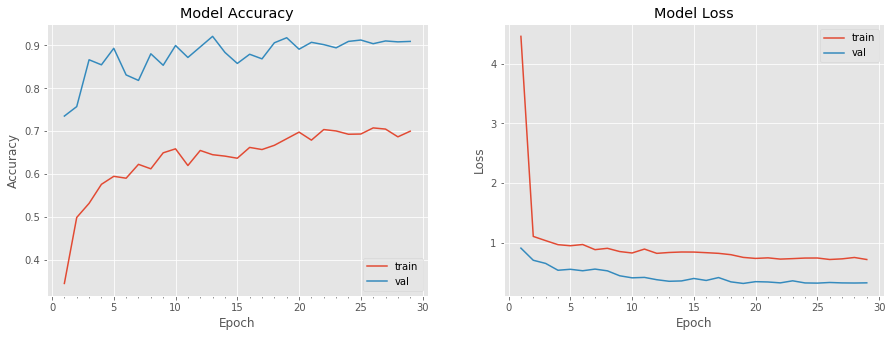

In [12]:
#------------------------
# Save model epoch history
HistoryTraining_Save(history, Model_Name)
#------------------------
# PLOT MODEL HISTORY
plot_model_history(history)

# Load model with best weight

In [13]:
#---------------
# Reload the weights that yielded the best validation accuracy
model.load_weights(Model_Name)

# Plot Classification - Confusion Matrix - ROC

Normalized confusion matrix
968/968 [==============================] - 9s 9ms/step


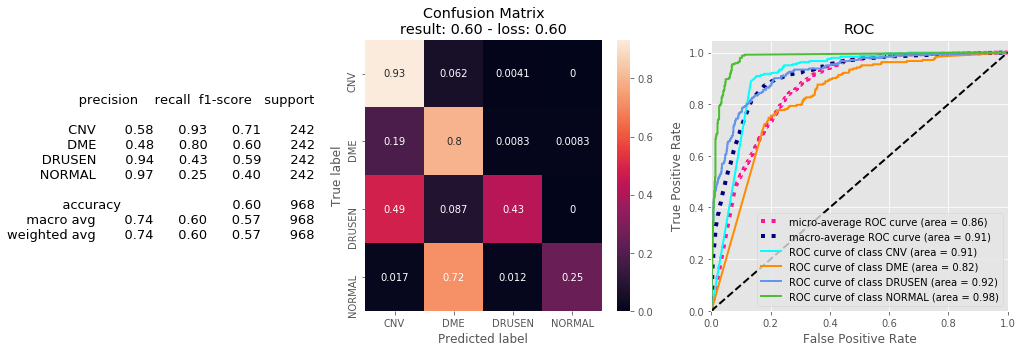

In [14]:
#------------------------
# PLOT MODEL HISTORY
Classification_ROC_Report(X_test_transform, Y_test_transform, model)

# Validation check

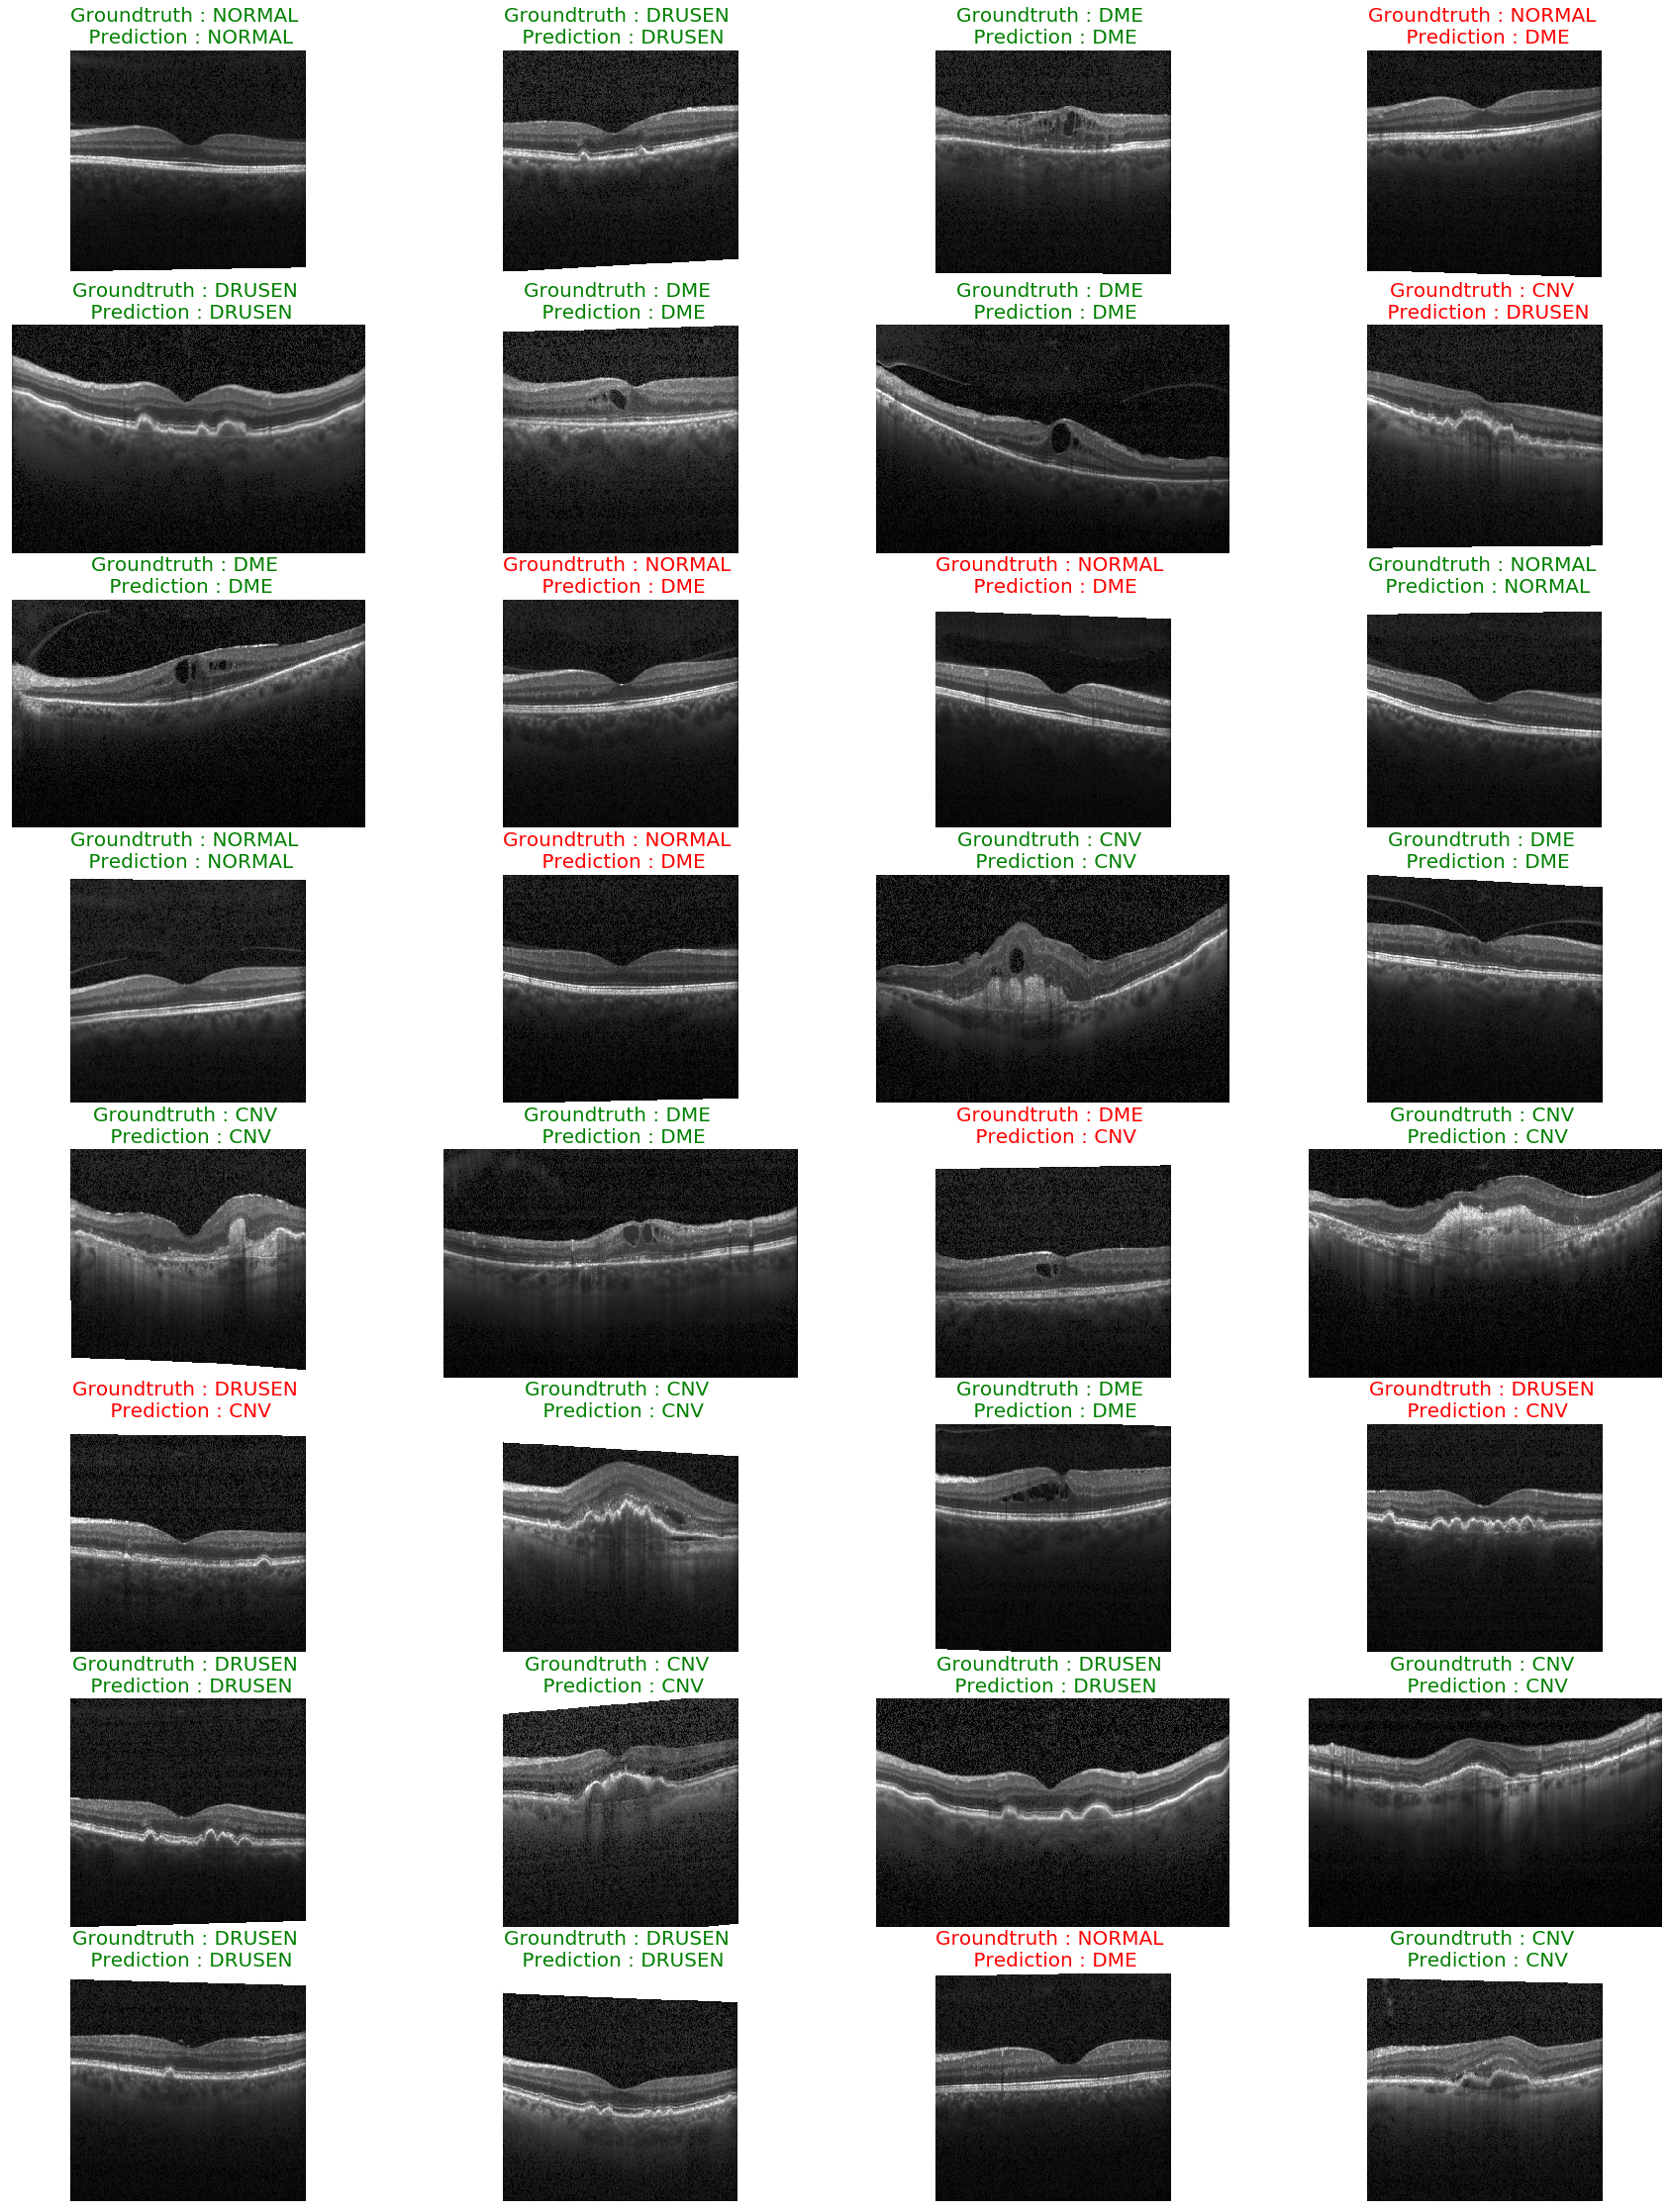

In [15]:
import matplotlib.pyplot as plt
from keras.preprocessing import image 

labels = {0: 'CNV', 1: 'DME', 2: 'DRUSEN', 3: 'NORMAL'}
Y_pred_classes = np.argmax(model.predict(X_valid),axis = 1) 
Y_true = np.argmax(Y_valid,axis = 1)
    
fig = plt.figure(figsize=(30, 40))   
for i in range(X_valid.shape[0]):
    ax = fig.add_subplot(8, 4, i + 1, xticks=[], yticks=[])
    ax.set_title("Groundtruth : {} \n Prediction : {}".format(labels[Y_true[i]],labels[Y_pred_classes[i]]), \
            color=("green" if Y_true[i] == Y_pred_classes[i] else "red"),fontsize=20) 
    img = image.load_img(X_val[i])
    ax.imshow(img)
plt.show()
